In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
raw_dementia = pd.read_csv('../data/dementia_status.csv', encoding='cp949')

raw_senior_rating = pd.read_csv('../data/senior_rating.csv', encoding='cp949')

In [3]:
df_dementia = raw_dementia.copy()
df_senior_rating = raw_senior_rating.copy()

## 1. Dementia

In [4]:
df_dementia.head()

,시점,행정구역(시도)별,행정구역(기초)별,성별,연령별,노인인구수,치매환자수,치매환자유병률,최경도 환자,경도 환자,중등도 환자,중증 환자,알츠하이머 환자수,알츠하이머 환자유병률,혈관성치매 환자수,혈관성치매 환자유병률,기타 환자환자수,기타 환자유병률,경도인지장애 환자수,경도인지장애 환자유병률
0,2020,전국,전국,전체,60~64세,3804709.5,23350.26,0.61,4062.95,9667.01,6001.02,3619.29,0.00,0.00,23350.26,0.61,0.00,0.00,568975.71,14.95
1,2020,전국,전국,전체,65~69세,2635592.0,36620.52,1.39,6371.97,15160.90,9411.47,5676.18,34204.14,1.30,0.00,0.00,2416.38,0.09,472079.05,17.91
2,2020,전국,전국,전체,70~74세,2000708.5,77236.58,3.86,13439.16,31975.94,19849.80,11971.67,74101.52,3.70,1868.56,0.09,1279.71,0.06,432263.10,21.61
3,2020,전국,전국,전체,75~79세,1602662.5,189626.57,11.83,32995.02,78505.40,48734.03,29392.12,79081.82,4.93,36835.05,2.30,73617.65,4.59,238681.35,14.89
4,2020,전국,전국,전체,80~84세,1110911.5,232892.50,20.96,40523.30,96417.50,59853.37,36098.34,182257.11,16.41,8518.04,0.77,42047.60,3.78,530714.37,47.77


In [5]:
df_dementia.tail()

,시점,행정구역(시도)별,행정구역(기초)별,성별,연령별,노인인구수,치매환자수,치매환자유병률,최경도 환자,경도 환자,중등도 환자,중증 환자,알츠하이머 환자수,알츠하이머 환자유병률,혈관성치매 환자수,혈관성치매 환자유병률,기타 환자환자수,기타 환자유병률,경도인지장애 환자수,경도인지장애 환자유병률
20407,2022,제주특별자치도,서귀포시,여,75~79세,3831.5,527.21,13.76,91.74,218.27,135.49,81.72,NaN,NaN,NaN,NaN,NaN,NaN,799.17,20.86
20408,2022,제주특별자치도,서귀포시,여,80~84세,3509.5,816.31,23.26,142.04,337.95,209.79,126.53,NaN,NaN,NaN,NaN,NaN,NaN,1616.41,46.06
20409,2022,제주특별자치도,서귀포시,여,85세이상,3604.5,1188.40,32.97,206.78,492.00,305.42,184.20,NaN,NaN,NaN,NaN,NaN,NaN,838.09,23.25
20410,2022,제주특별자치도,서귀포시,여,60세이상,28784.0,2737.76,9.51,476.37,1133.43,703.60,424.35,NaN,NaN,NaN,NaN,NaN,NaN,5921.54,20.57
20411,2022,제주특별자치도,서귀포시,여,65세이상,20525.5,2637.09,12.85,458.85,1091.76,677.73,408.75,NaN,NaN,NaN,NaN,NaN,NaN,5371.43,26.17


우선 `행정구역(시도)별`의 '전국'을 시점에 따라 봐보자

In [6]:
dementia_1 = df_dementia[(df_dementia['행정구역(시도)별'] == '전국') & (df_dementia['성별'] == '전체')]

dementia_1 # 치매환자유병률은 유도변수

,시점,행정구역(시도)별,행정구역(기초)별,성별,연령별,노인인구수,치매환자수,치매환자유병률,최경도 환자,경도 환자,중등도 환자,중증 환자,알츠하이머 환자수,알츠하이머 환자유병률,혈관성치매 환자수,혈관성치매 환자유병률,기타 환자환자수,기타 환자유병률,경도인지장애 환자수,경도인지장애 환자유병률
0,2020,전국,전국,전체,60~64세,3804709.5,23350.26,0.61,4062.95,9667.01,6001.02,3619.29,0.00,0.00,23350.26,0.61,0.00,0.00,568975.71,14.95
1,2020,전국,전국,전체,65~69세,2635592.0,36620.52,1.39,6371.97,15160.90,9411.47,5676.18,34204.14,1.30,0.00,0.00,2416.38,0.09,472079.05,17.91
2,2020,전국,전국,전체,70~74세,2000708.5,77236.58,3.86,13439.16,31975.94,19849.80,11971.67,74101.52,3.70,1868.56,0.09,1279.71,0.06,432263.10,21.61
3,2020,전국,전국,전체,75~79세,1602662.5,189626.57,11.83,32995.02,78505.40,48734.03,29392.12,79081.82,4.93,36835.05,2.30,73617.65,4.59,238681.35,14.89
4,2020,전국,전국,전체,80~84세,1110911.5,232892.50,20.96,40523.30,96417.50,59853.37,36098.34,182257.11,16.41,8518.04,0.77,42047.60,3.78,530714.37,47.77
5,2020,전국,전국,전체,85세이상,784800.0,303815.65,38.71,52863.92,125779.68,78080.62,47091.43,264750.04,33.73,25376.03,3.23,13632.54,1.74,175257.32,22.33
6,2020,전국,전국,전체,60세이상,11939384.0,863542.09,7.23,150256.32,357506.43,221930.32,133849.02,634394.63,5.31,95947.94,0.80,132993.88,1.11,2417970.90,20.25
7,2020,전국,전국,전체,65세이상,8134674.5,840191.82,10.33,146193.38,347839.41,215929.30,130229.73,634394.63,7.80,72597.68,0.89,132993.88,1.63,1848995.19,22.73
6672,2022,전국,전체,전체,60~64세,4157520.0,25482.00,0.61,4434.00,10549.00,6549.00,3950.00,0.00,0.00,25482.00,0.61,0.00,0.00,620678.00,14.92
6673,2022,전국,전체,전체,65~69세,3074784.0,42775.00,1.39,7443.00,17709.00,10993.00,6630.00,39895.00,1.29,0.00,0.00,2880.00,0.09,550628.00,17.90


In [7]:
dementia_1_1 = dementia_1[['시점', '연령별', '노인인구수', '치매환자수', '치매환자유병률']]

dementia_1_1

,시점,연령별,노인인구수,치매환자수,치매환자유병률
0,2020,60~64세,3804709.5,23350.26,0.61
1,2020,65~69세,2635592.0,36620.52,1.39
2,2020,70~74세,2000708.5,77236.58,3.86
3,2020,75~79세,1602662.5,189626.57,11.83
4,2020,80~84세,1110911.5,232892.50,20.96
5,2020,85세이상,784800.0,303815.65,38.71
6,2020,60세이상,11939384.0,863542.09,7.23
7,2020,65세이상,8134674.5,840191.82,10.33
6672,2022,60~64세,4157520.0,25482.00,0.61
6673,2022,65~69세,3074784.0,42775.00,1.39


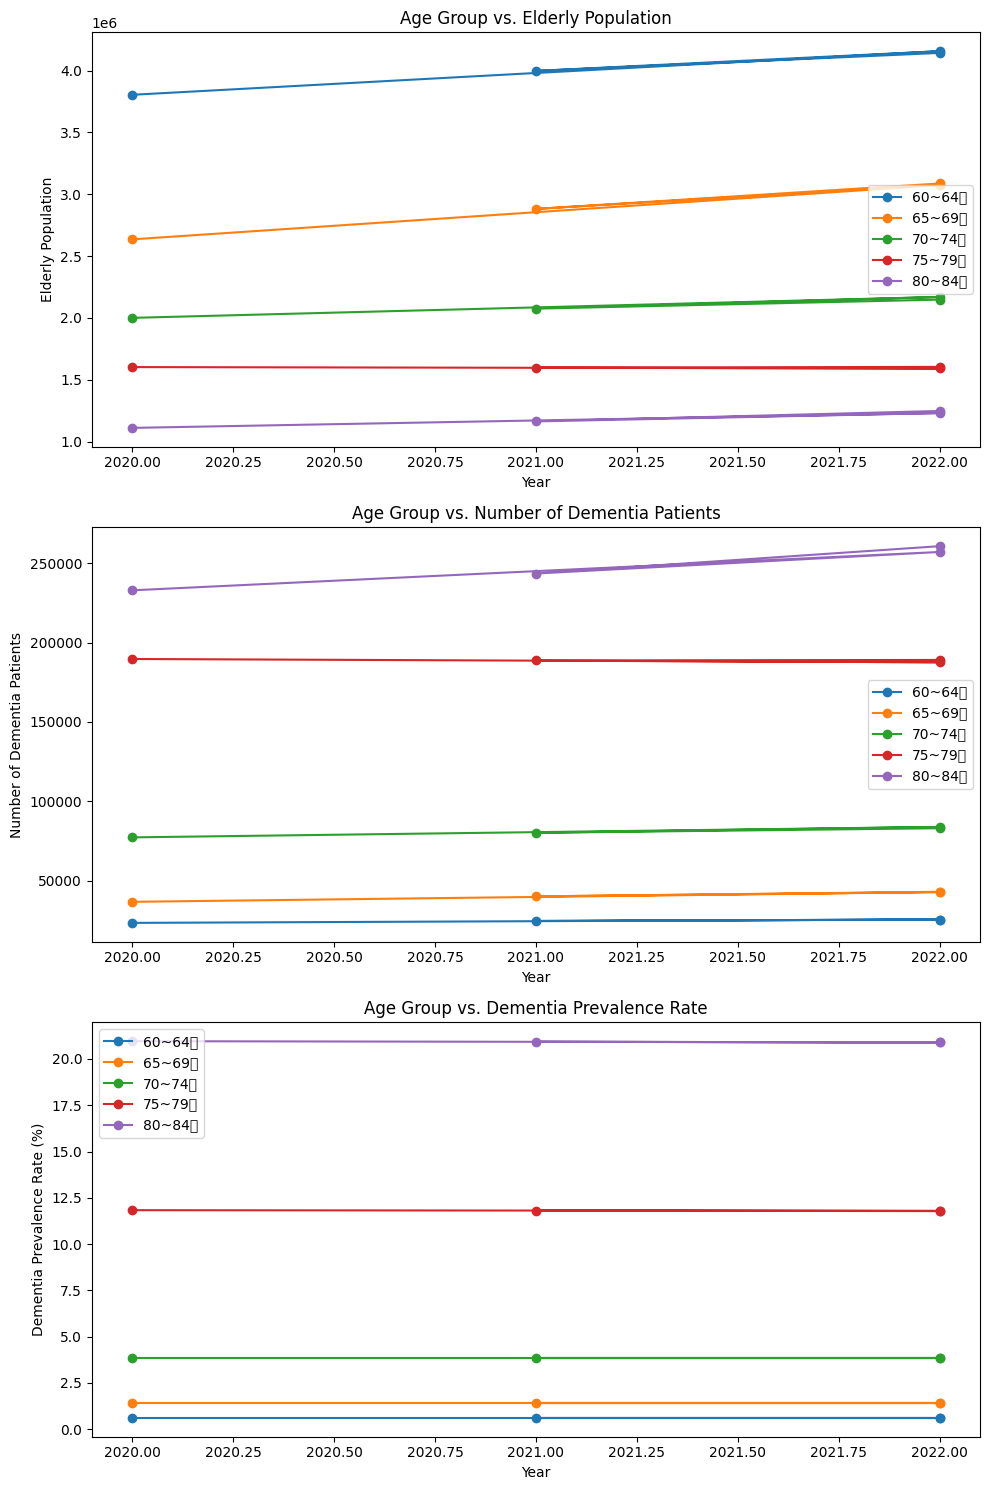

In [8]:
# 연령별로 데이터 분리
age_groups = dementia_1_1['연령별'].unique()[0:5] # '85세이상', '60세이상', '65세이상' 은 중복 그룹


# 시각화
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# 노인 인구수 시각화
for age in age_groups:
    subset = dementia_1_1[dementia_1_1['연령별'] == age]
    ax[0].plot(subset['시점'], subset['노인인구수'], label=age, marker='o')

ax[0].set_title('Age Group vs. Elderly Population')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Elderly Population')
ax[0].legend()

# 치매 환자수 시각화
for age in age_groups:
    subset = dementia_1_1[dementia_1_1['연령별'] == age]
    ax[1].plot(subset['시점'], subset['치매환자수'], label=age, marker='o')

ax[1].set_title('Age Group vs. Number of Dementia Patients')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of Dementia Patients')
ax[1].legend()

# 치매 환자 유병률 시각화
for age in age_groups:
    subset = dementia_1_1[dementia_1_1['연령별'] == age]
    ax[2].plot(subset['시점'], subset['치매환자유병률'], label=age, marker='o')

ax[2].set_title('Age Group vs. Dementia Prevalence Rate')
ax[2].set_xlabel('Year')
ax[2].set_ylabel('Dementia Prevalence Rate (%)')
ax[2].legend()

plt.tight_layout()
plt.show()

## 2. Senior rating

In [9]:
df_senior_rating.head()

,시도,시군구,자격별,성별,연령구분,신청자,1등급,2등급,3등급,4등급,5등급,인지지원등급,등급외A,등급외B,등급외C
0,서울,종로구,일반,남자,65세미만,33,0,4,5,8,0,0,3,5,1
1,서울,종로구,일반,남자,65-69세,54,1,3,12,9,0,0,10,1,3
2,서울,종로구,일반,남자,70-74세,69,2,6,12,17,1,0,6,2,1
3,서울,종로구,일반,남자,75-79세,103,7,9,18,27,4,0,6,3,0
4,서울,종로구,일반,남자,80-84세,164,12,11,30,47,13,1,11,5,2


In [10]:
df_senior_rating.tail()

,시도,시군구,자격별,성별,연령구분,신청자,1등급,2등급,3등급,4등급,5등급,인지지원등급,등급외A,등급외B,등급외C
10556,제주,서귀포시,감경,여자,65-69세,18,1,1,5,7,1,0,0,0,0
10557,제주,서귀포시,감경,여자,70-74세,50,1,4,10,18,4,3,2,1,1
10558,제주,서귀포시,감경,여자,75-79세,95,6,6,14,27,19,5,1,4,1
10559,제주,서귀포시,감경,여자,80-84세,216,10,17,42,80,37,16,0,2,1
10560,제주,서귀포시,감경,여자,85세이상,538,40,61,144,195,64,16,0,0,0


In [11]:
df_senior_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10561 entries, 0 to 10560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도      10561 non-null  object
 1   시군구     10514 non-null  object
 2   자격별     10561 non-null  object
 3   성별      10561 non-null  object
 4   연령구분    10561 non-null  object
 5   신청자     10561 non-null  int64 
 6   1등급     10561 non-null  int64 
 7   2등급     10561 non-null  int64 
 8   3등급     10561 non-null  int64 
 9   4등급     10561 non-null  int64 
 10  5등급     10561 non-null  int64 
 11  인지지원등급  10561 non-null  int64 
 12  등급외A    10561 non-null  int64 
 13  등급외B    10561 non-null  int64 
 14  등급외C    10561 non-null  int64 
dtypes: int64(10), object(5)
memory usage: 1.2+ MB


In [12]:
df_senior_rating.describe()

,신청자,1등급,2등급,3등급,4등급,5등급,인지지원등급,등급외A,등급외B,등급외C
count,10561.000000,10561.000000,10561.000000,10561.000000,10561.000000,10561.000000,10561.000000,10561.000000,10561.000000,10561.000000
mean,134.074898,4.946785,9.177067,28.190134,47.700881,11.885333,2.447117,6.937317,4.290976,1.644636
std,247.541581,11.767887,22.388014,61.475958,92.749347,23.491541,5.051672,13.899812,7.918458,3.037476
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,1.000000,3.000000,9.000000,15.000000,3.000000,1.000000,2.000000,1.000000,0.000000
75%,147.000000,5.000000,8.000000,27.000000,49.000000,12.000000,3.000000,7.000000,5.000000,2.000000
max,4506.000000,290.000000,487.000000,1168.000000,1606.000000,408.000000,123.000000,199.000000,106.000000,48.000000


In [13]:
df_senior_rating.describe(include = 'O')

,시도,시군구,자격별,성별,연령구분
count,10561,10514,10561,10561,10561
unique,17,207,4,2,6
top,경기,동구,일반,여자,85세이상
freq,1447,279,2760,5327,1825


In [14]:
df_senior_rating['시군구'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', '서구', '동구',
       '영도구', '부산진구', '동래구', '남구', '북구', '해운대구', '사하구', '금정구', '연제구',
       '수영구', '사상구', '기장군', '수성구', '달서구', '달성군', '군위군', '미추홀구', '연수구',
       '남동구', '부평구', '계양구', '강화군', '옹진군', '광산구', '유성구', '대덕구', '울주군', nan,
       '수원시', '성남시', '의정부시', '안양시', '부천시', '광명시', '평택시', '동두천시', '안산시',
       '고양시', '과천시', '구리시', '남양주시', '오산시', '시흥시', '군포시', '의왕시', '하남시',
       '용인시', '파주시', '이천시', '안성시', '김포시', '화성시', '광주시', '양주시', '포천시',
       '여주시', '연천군', '가평군', '양평군', '춘천시', '원주시', '강릉시', '동해시', '태백시',
       '속초시', '삼척시', '홍천군', '횡성군', '영월군', '평창군', '정선군', '철원군', '화천군',
       '양구군', '인제군', '고성군', '양양군', '청주시', '충주시', '제천시', '청원군', '보은군',
       '옥천군', '영동군', '증평군', '진천군', '괴산군', '음성군', '단양군', '천안시', '공주시',
       '보령시', '아산시', '서산시', '논산시', '계룡시', '금산군', '부여군', '서천군', '청양군',
       '홍성군

In [16]:
df_senior_rating['연령구분'].unique()

array(['65세미만', '65-69세', '70-74세', '75-79세', '80-84세', '85세이상'],
      dtype=object)

In [17]:
df_senior_rating[df_senior_rating['시군구'].isna()]
# 시도가 세종인 경우는 시군구가 Null

,시도,시군구,자격별,성별,연령구분,신청자,1등급,2등급,3등급,4등급,5등급,인지지원등급,등급외A,등급외B,등급외C
3500,세종,NaN,일반,남자,65세미만,39,1,3,8,12,2,0,3,4,0
3501,세종,NaN,일반,남자,65-69세,97,4,0,19,27,6,0,12,6,2
3502,세종,NaN,일반,남자,70-74세,146,5,9,18,55,10,5,15,10,1
3503,세종,NaN,일반,남자,75-79세,191,8,11,35,58,30,1,11,8,1
3504,세종,NaN,일반,남자,80-84세,276,3,9,52,88,36,8,10,13,3
3505,세종,NaN,일반,남자,85세이상,292,2,23,53,113,42,6,8,13,3
3506,세종,NaN,일반,여자,65세미만,32,4,1,5,11,0,0,0,1,0
3507,세종,NaN,일반,여자,65-69세,108,2,6,14,23,15,2,11,5,0
3508,세종,NaN,일반,여자,70-74세,203,7,10,16,59,24,7,18,9,5
3509,세종,NaN,일반,여자,75-79세,402,4,14,57,107,52,9,29,31,7


## 